# Análisis exploratorio de feature selection
*   Completitud de variables,
*   Varianza de variables
*   Determinar qué variables vale la pena eliminar/mantener

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [4]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)

In [15]:
data.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


# Completeness analysis

In [6]:
#Completeness information

#Def completeness_function

def completeness_analysis(df: pd.DataFrame, threshold_completeness: float = 0) -> pd.DataFrame:
    """
    Calculates the percentage of NON-zero values for each numeric column in a DataFrame.
    """
    #Select only columns of numeric type
    numerics = df.select_dtypes(include=np.number)
    #print(numerics)
    #Calculate the percentage of non-zero values for each column
    completeness = numerics.apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create dataframe
    df_completeness = completeness.reset_index()
    df_completeness.columns = ['Variable', 'completeness_Pct']
    df_completeness = df_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Filter data
    #Only data beyond threshold
    #df_completeness_th = df_completeness[df_completeness['covariablesmpleteness_Pct'] > threshold_completeness]

    #Sort the results to see the variables with the lowest completeness.
    #df_completeness_th = df_completeness_th.sort_values(by='completeness_Pct', ascending=True)

    #make it a list of numerical variables that passed the filter
    #vars_filtered = df_completeness_th['Variable'].tolist()

    #List of non-numeric variables to keep them forever.
    #non_numeric_vars = df.select_dtypes(exclude=np.number).columns.tolist()

    #Final merge
    #final_cols = non_numeric_vars + vars_filtered

    #Filter final dataframe
    #filtered_df = df[final_cols]
    # Devolver ambos DataFrames
    #return filtered_df, df_completeness, df_completeness_th
    #Devolver variables finales
    return df_completeness

In [37]:
def completeness_analysis(df: pd.DataFrame, min_completeness_pct: float = 40.0):
    """
    Filtra las columnas numéricas de un DataFrame basado en un porcentaje mínimo
    de valores no nulos y conserva todas las columnas no numéricas.

    Args:
      df (pd.DataFrame): El DataFrame de entrada.
      min_completeness_pct (float): El porcentaje mínimo de valores NO NULOS
                                     requerido para que una columna numérica sea conservada (ej. 40.0).

    Returns:
      tuple: Una tupla que contiene:
        - pd.DataFrame: El DataFrame original filtrado, conteniendo todas las
                        columnas no numéricas y las numéricas que pasaron el umbral.
        - list: Una lista con los nombres de las columnas numéricas que pasaron el filtro.
    """
    # 1. Identificar columnas numéricas y no numéricas
    columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
    columnas_no_numericas = df.select_dtypes(exclude=np.number).columns.tolist()

    # 2. Calcular el porcentaje de completitud (valores no-cero) solo para las columnas numéricas
    completeness = df[columnas_numericas].apply(lambda col: (col != 0).sum() / len(col) * 100)

    # 3. Obtener la lista de variables numéricas que pasaron el filtro
    variables_que_pasan = completeness[completeness >= min_completeness_pct].index.tolist()

    # 4. Combinar las columnas no-numéricas (que siempre se guardan) con las numéricas que pasaron
    columnas_finales = columnas_no_numericas + variables_que_pasan

    # 5. Filtrar el DataFrame original para obtener la matriz final
    df_filtrado = df[columnas_finales]

    # Devolver los dos resultados solicitados
    return df_filtrado, variables_que_pasan

In [38]:
matriz_filtrada, lista_de_variables = completeness_analysis(data, 40.0)

In [41]:
matriz_filtrada.shape

(84, 6581)

In [44]:
lista_de_variables[0:-10]

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Thal',
 'Braak',
 'CERAD',
 'ADNC',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_5',
 'Race_7',
 'Race_8',
 'Race_9',
 'Race_11',
 'Cognitive_Status_encoded',
 'LATE_1',
 'Lewy_5',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'diameter_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9',
 'n_components_Astrocyte_A9',
 'assortativity_Astrocyte_A9',
 'deg_mean_Astrocyte_A9',
 'deg_median_Astrocyte_A9',
 'deg_sd_Astrocyte_A9',
 'kcore_max_Astrocyte_A9',
 'Q_modularity_Astrocyte_A9',
 'perc_targeted_50_Astrocyte_A9',
 'n_communities_Astrocyte_A9',
 'largest_community_size_Astrocyte_A9',
 'n_nodes_Astrocyte_MTG',
 'n_edges_Astrocyte_MTG',
 'avg_path_len_Astrocyte_MTG',
 'diameter_Astrocyte_MTG',
 'global

In [45]:
matriz_filtrada.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


from matplotlib import pyplot as plt
_df_1['Age at Death'].plot(kind='hist', bins=20, title='Age at Death')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Years of education'].plot(kind='hist', bins=20, title='Years of education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PMI'].plot(kind='hist', bins=20, title='PMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['APOE Genotype'].plot(kind='hist', bins=20, title='APOE Genotype')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age at Death', y='Years of education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Years of education', y='PMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PMI', y='APOE Genotype', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='APOE Genotype', y='Thal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['APOE Genotype']
  ys = series['Age at Death']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('APOE Genotype', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('APOE Genotype')
_ = plt.ylabel('Age at Death')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['APOE Genotype']
  ys = series['Years of education']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('APOE Genotype', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('APOE Genotype')
_ = plt.ylabel('Years of education')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['APOE Genotype']
  ys = series['PMI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('APOE Genotype', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('APOE Genotype')
_ = plt.ylabel('PMI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['APOE Genotype']
  ys = series['Thal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('APOE Genotype', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('APOE Genotype')
_ = plt.ylabel('Thal')

from matplotlib import pyplot as plt
_df_13['Age at Death'].plot(kind='line', figsize=(8, 4), title='Age at Death')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Years of education'].plot(kind='line', figsize=(8, 4), title='Years of education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PMI'].plot(kind='line', figsize=(8, 4), title='PMI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['APOE Genotype'].plot(kind='line', figsize=(8, 4), title='APOE Genotype')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
completeness_analysis.head(10)

AttributeError: 'tuple' object has no attribute 'head'

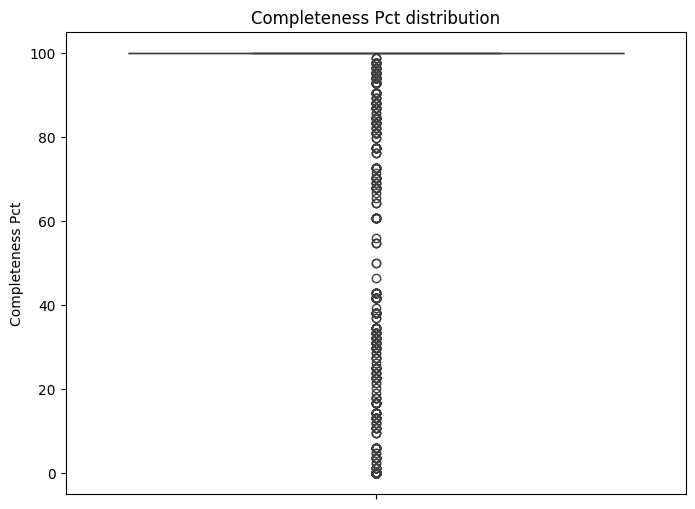

In [12]:
# Creando el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=completeness_analysis['completeness_Pct'])
plt.title('Completeness Pct distribution')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

In [26]:
#Def completeness_function

def completeness_analysis(df: pd.DataFrame, threshold_completeness: float = 0) -> pd.DataFrame:
    """
    Calculates the percentage of NON-zero values for each numeric column in a DataFrame.
    """
    #Select only columns of numeric type
    numerics = df.select_dtypes(include=np.number)
    #print(numerics)
    #Calculate the percentage of non-zero values for each column
    completeness = numerics.apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create dataframe
    df_completeness = completeness.reset_index()
    df_completeness.columns = ['Variable', 'completeness_Pct']
    df_completeness = df_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Filter data
    #Only data beyond threshold
    df_completeness_th = df_completeness[df_completeness['completeness_Pct'] > threshold_completeness]

    #Sort the results to see the variables with the lowest completeness.
    df_completeness_th = df_completeness_th.sort_values(by='completeness_Pct', ascending=True)

    #make it a list of numerical variables that passed the filter
    vars_filtered = df_completeness_th['Variable'].tolist()

    #List of non-numeric variables to keep them forever.
    non_numeric_vars = df.select_dtypes(exclude=np.number).columns.tolist()

    #Final merge
    final_cols = non_numeric_vars + vars_filtered

    #Filter final dataframe
    filtered_df = df[final_cols]
    # Devolver ambos DataFrames
    return df_completeness_thr, filtered_df, vars_filtered
    #Devolver variables finales
    #return df_completeness

In [46]:
## DENUEBO

In [56]:
def completeness_filter(df: pd.DataFrame, min_completeness_pct: float = 40.0):

    #Numeric and non-numeric columns
    numerics = df.select_dtypes(include=np.number).columns.tolist()
    no_numerics = df.select_dtypes(exclude=np.number).columns.tolist()
    #Completeness analysis
    completeness = df[numerics].apply(lambda col: (col != 0).sum() / len(col) * 100)

    # 3. Crear la tabla de completitud (Tercer resultado)
    df_completeness = completeness.reset_index()
    df_completeness.columns = ['Variable', 'completeness_Pct']
    df_completeness = df_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Vars that passed the filter
    numeric_filtered = completeness[completeness >= min_completeness_pct].index.tolist()
    #Combine non-numeric columns (which are always saved) with numeric columns that passed
    final_cols = no_numerics + numeric_filtered

    #Final filter
    df_filtered = df[final_cols]

    return df_filtered, numeric_filtered, df_completeness

In [57]:
completeness_filtered, completeness_vars, completeness_pct = completeness_filter(data, 60.0)

In [50]:
completeness_filter.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


In [58]:
completeness_pct.head(10)

,Variable,completeness_Pct
222,clustering_global_L4-IT_MTG,0.0
706,largest_community_size_Pax6_A9,0.0
240,clustering_local_mean_L5-6-NP_A9,0.0
241,clustering_global_L5-6-NP_A9,0.0
688,n_nodes_Pax6_A9,0.0
689,n_edges_Pax6_A9,0.0
716,clustering_global_Pax6_MTG,0.0
722,Q_modularity_Pax6_MTG,0.0
221,clustering_local_mean_L4-IT_MTG,0.0
705,n_communities_Pax6_A9,0.0
